### Practica 2 VISION POR COMPUTADOR TAREA 2

In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Carga imagen desde archivo y convierte a RGB

In [3]:
#Lee imagen de archivo
img = cv2.imread('mandril.jpg') 

#Conversión de la imagen a niveles de grises de la imagen original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Obtiene contornos con el operador de Canny
canny = cv2.Canny(gris, 100, 200)

Contar el número de píxeles no nulos por columna y visualizar

Valor máximo de píxeles blancos por columna: 0.365234375
Número de columnas con más del 95% del valor máximo: 6
Posiciones de las columnas con más del 95% del valor máximo: [ 92  99 104 115 119 383]


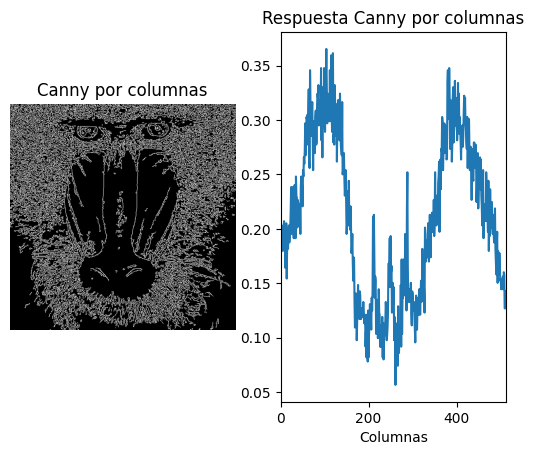

In [34]:
def CannyToColPlot(canny, title):
    col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
    cols = col_counts[0] / (255 * canny.shape[0])
    maxcol = np.max(cols)
    threshold = 0.95 * maxcol
    columnas_con_maximos = np.where(cols >= threshold)[0]

    plt.figure()
    plt.subplot(1, 2, 1)
    plt.axis("off")
    plt.title(f"{title} por columnas")
    plt.imshow(canny, cmap='gray')
    
    plt.subplot(1, 2, 2)
    plt.title(f"Respuesta {title} por columnas")
    plt.xlabel("Columnas")
    plt.ylabel("% píxeles")
    plt.plot(cols)
    plt.xlim([0, canny.shape[1]])

    print(f"Valor máximo de píxeles blancos por columna: {maxcol}")
    print(f"Número de columnas con más del 95% del valor máximo: {len(columnas_con_maximos)}")
    print(f"Posiciones de las columnas con más del 95% del valor máximo: {columnas_con_maximos}")
    
    return columnas_con_maximos, maxcol

# Aplicar funciones a Canny
columnas_canny, maxcol_canny = CannyToColPlot(canny, "Canny")


TAREA: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.95*maxfil.

Valor máximo de píxeles blancos por fila: 0.4296875
Número de filas con más del 95% del valor máximo: 2
Posiciones de las filas con más del 95% del valor máximo: [ 12 100]


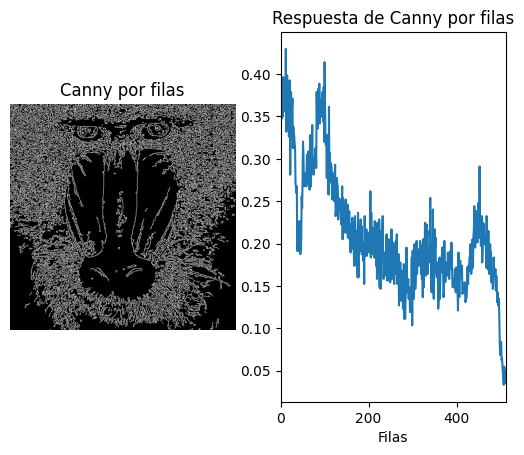

In [33]:
def CannyToRowPlot(canny, text):
    row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
    rows = row_counts[:, 0] / (255 * canny.shape[1])
    maxfil = np.max(rows)
    threshold = 0.95 * maxfil
    filas_con_maximos = np.where(rows >= threshold)[0]

    plt.figure()
    plt.subplot(1, 2, 1)
    plt.axis("off")
    plt.title(f"{text}")
    plt.imshow(canny, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title(f"Respuesta de {text}")
    plt.xlabel("Filas")
    plt.ylabel("% píxeles")
    plt.plot(rows)
    plt.xlim([0, canny.shape[0]])

    print(f"Valor máximo de píxeles blancos por fila: {maxfil}")
    print(f"Número de filas con más del 95% del valor máximo: {len(filas_con_maximos)}")
    print(f"Posiciones de las filas con más del 95% del valor máximo: {filas_con_maximos}")
    
    return filas_con_maximos, maxfil

# Aplicar funciones a Canny
filas_canny, maxfil_canny = CannyToRowPlot(canny, "Canny por filas")

TAREA: Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. 

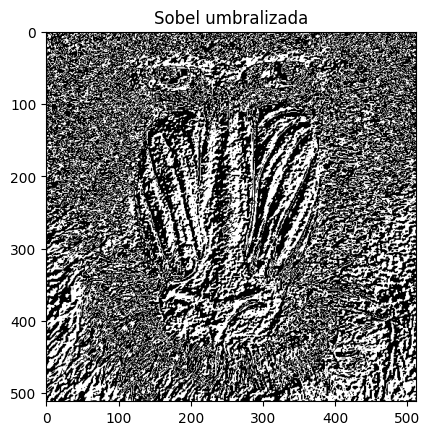

Valor máximo de píxeles blancos por columna: 0.59765625
Número de columnas con más del 95% del valor máximo: 4
Posiciones de las columnas con más del 95% del valor máximo: [261 262 263 264]

Valor máximo de píxeles blancos por fila: 0.55078125
Número de filas con más del 95% del valor máximo: 2
Posiciones de las filas con más del 95% del valor máximo: [508 509]


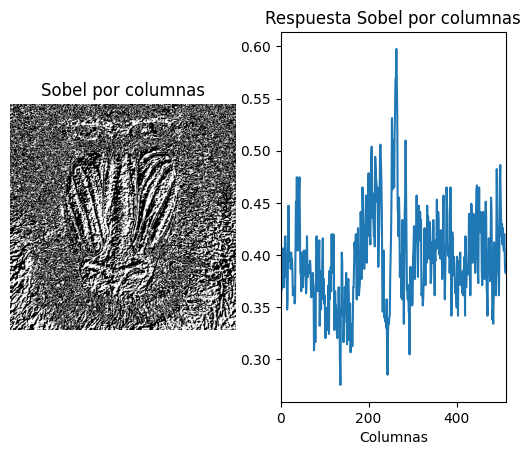

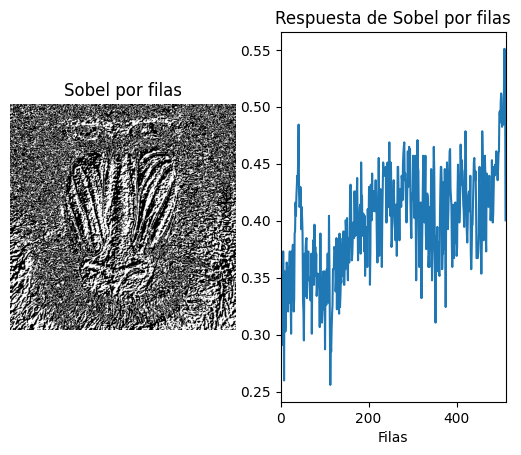

In [32]:
# Gaussiana para suavizar la imagen original, eliminando altas frecuencias
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y

#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

#Define valor umbral
valorUmbral = 170

sobel8 = np.uint8(sobel) # Convertimos la imagen a 8 bits

#Obtiene imagen umbralizada para dicho valor definido
res, imagenUmbralizada = cv2.threshold(sobel8, valorUmbral, 255, cv2.THRESH_BINARY)
#Muestra resultado
plt.imshow(imagenUmbralizada, cmap='gray') #Visualiza con mapa de color gris
plt.title(f"Sobel umbralizada")
plt.show()

# Realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos
# Aplicar funciones a Sobel umbralizado
columnas_sobel, maxcol_sobel = CannyToColPlot(imagenUmbralizada, "Sobel")
print("")
filas_sobel, maxfil_sobel = CannyToRowPlot(imagenUmbralizada, "Sobel por filas")

Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

La línea roja son las filas que tienen valor máximo
La línea azul son las columnas que tienen valor máximo


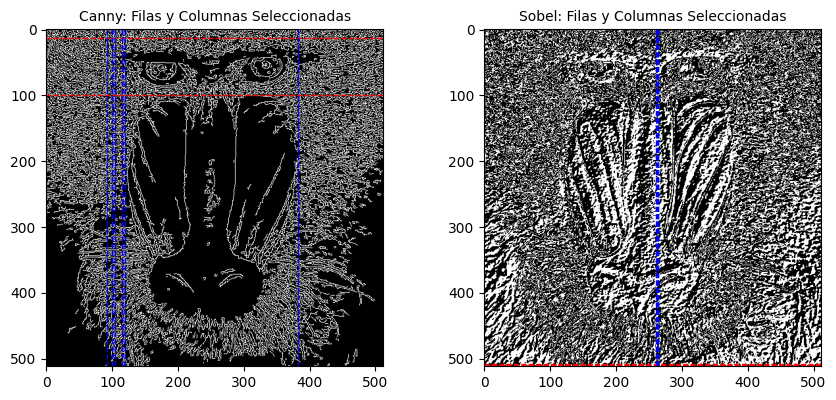

In [53]:
def RemarcarFilasColumnas(ax, imagen, filas, columnas, titulo):
    ax.imshow(imagen, cmap='gray')
    ax.set_title(titulo, fontsize=10)  # Título más pequeño
    
    # Remarcar filas
    for fila in filas:
        ax.axhline(y=fila, color='red', linestyle='--', linewidth=1)
    
    # Remarcar columnas
    for columna in columnas:
        ax.axvline(x=columna, color='blue', linestyle='--', linewidth=1)

# Crear una figura con dos subplots horizontales
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Tamaño ajustado para mostrar una al lado de la otra

print("La línea roja son las filas que tienen valor máximo")
print("La línea azul son las columnas que tienen valor máximo")

# Remarcar en Canny
RemarcarFilasColumnas(axes[0], canny, filas_canny, columnas_canny, "Canny: Filas y Columnas Seleccionadas")

# Remarcar en Sobel
RemarcarFilasColumnas(axes[1], imagenUmbralizada, filas_sobel, columnas_sobel, "Sobel: Filas y Columnas Seleccionadas")

# Ajustar espaciado entre las imágenes
plt.subplots_adjust(wspace=0.3)

plt.show()



Visualizamos las diferencias en un histograma

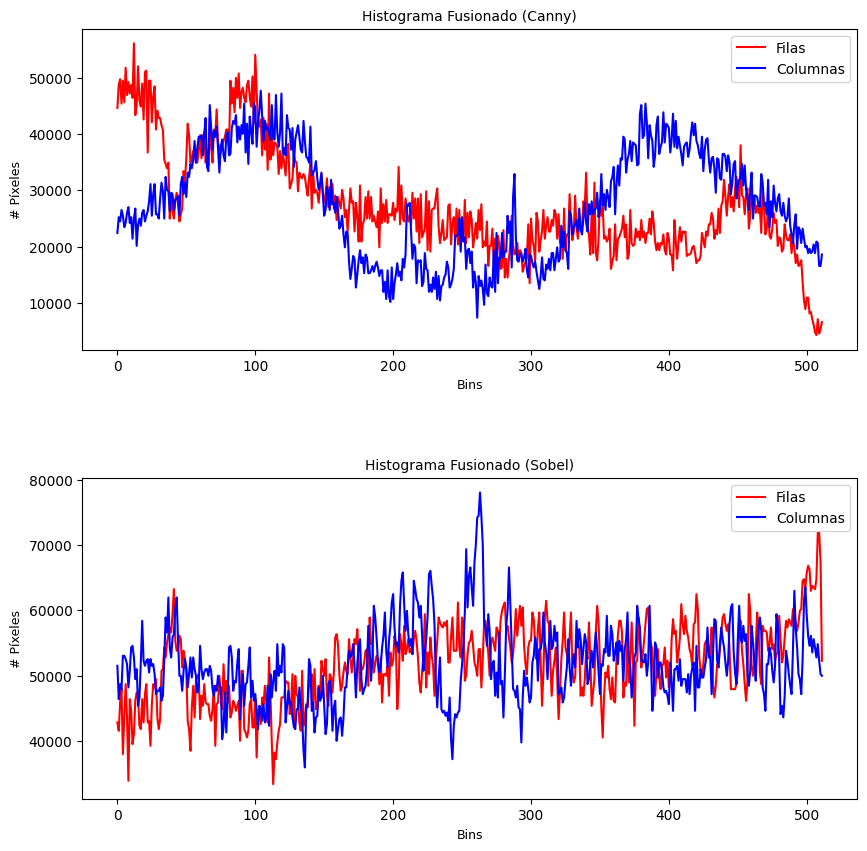

In [54]:
# Función para calcular el histograma fusionado de filas y columnas
def HistogramaFusionado(ax, hist_filas, hist_columnas, titulo):
    ax.set_title(titulo, fontsize=10)
    ax.set_xlabel("Bins", fontsize=9)
    ax.set_ylabel("# Píxeles", fontsize=9)
    
    # Graficar histogramas fusionados
    ax.plot(hist_filas, color='red', label='Filas')
    ax.plot(hist_columnas, color='blue', label='Columnas')
    ax.legend()

# Crear una figura con 2 filas y 1 columna
fig, axes = plt.subplots(2, 1, figsize=(10, 10))  # Dos filas y una columna

# Histograma fusionado de Canny
hist_filas_canny = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32S).flatten()
hist_columnas_canny = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32S).flatten()

# Graficar histograma fusionado de Canny
HistogramaFusionado(axes[0], hist_filas_canny, hist_columnas_canny, "Histograma Fusionado (Canny)")

# Histograma fusionado de Sobel
hist_filas_sobel = cv2.reduce(imagenUmbralizada, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32S).flatten()
hist_columnas_sobel = cv2.reduce(imagenUmbralizada, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32S).flatten()

# Graficar histograma fusionado de Sobel
HistogramaFusionado(axes[1], hist_filas_sobel, hist_columnas_sobel, "Histograma Fusionado (Sobel)")

# Ajustar espaciado entre las imágenes
plt.subplots_adjust(wspace=0.3, hspace=0.4)

plt.show()
